In [ ]:
import cv2
import numpy as np


In [ ]:
img=cv2.imread("image_2.jpg")
print(img)

[[[151 179 196]
  [151 179 196]
  [151 179 196]
  ...
  [140 166 178]
  [140 166 178]
  [140 166 178]]

 [[150 178 195]
  [150 178 195]
  [150 178 195]
  ...
  [140 166 178]
  [140 166 178]
  [140 166 178]]

 [[150 178 195]
  [150 178 195]
  [150 178 195]
  ...
  [140 166 178]
  [140 166 178]
  [140 166 178]]

 ...

 [[ 62  70  60]
  [ 62  70  60]
  [ 62  70  60]
  ...
  [103 122 130]
  [103 122 130]
  [103 122 130]]

 [[ 62  70  60]
  [ 62  70  60]
  [ 62  70  60]
  ...
  [103 122 130]
  [103 122 130]
  [103 122 130]]

 [[ 62  70  60]
  [ 62  70  60]
  [ 62  70  60]
  ...
  [104 123 131]
  [104 123 131]
  [104 123 131]]]


In [ ]:
from google.colab.patches import cv2_imshow
import os

In [ ]:
cv2_imshow(img)

In [ ]:
cv2.imwrite("Evans.jpg",img)

True

In [ ]:
import imutils 
imutils.resize(img,width = 300)
(h,w) = img.shape[:2]
print(h,w)
cv2_imshow(img)



In [ ]:
#big=cv2.resize(img,(300,300))
#cv2_imshow(big)

In [ ]:
import imutils
Rotated_image=imutils.rotate(img,angle=90)
cv2_imshow(Rotated_image)

In [ ]:
!wget -N https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
 
 
!wget -N https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel


--2022-09-12 09:09:20--  https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28104 (27K) [text/plain]
Saving to: ‘deploy.prototxt’

deploy.prototxt     100%[===================>]  27.45K  --.-KB/s    in 0.005s  

Last-modified header missing -- time-stamps turned off.
2022-09-12 09:09:20 (5.34 MB/s) - ‘deploy.prototxt’ saved [28104/28104]

--2022-09-12 09:09:20--  https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubus

In [ ]:
print("[INFO] loading model...")
prototxt = 'deploy.prototxt'
model = 'res10_200x200_ssd_iter_140000.caffemodel'
net = cv2.dnn.readNetFromCaffe(prototxt, model)


[INFO] loading model...


In [ ]:
image = imutils.resize(img, width=300)
blob = cv2.dnn.blobFromImage(cv2.resize(img, (200, 200)), 1.0, (200, 200), (104.0, 177.0, 123.0))
cv2_imshow(image)

In [ ]:
print("[INFO] computing object detections...")
net.setInput(blob)
detections = net.forward()

[INFO] computing object detections...


error: ignored

In [ ]:
for i in range(0, detections.shape[2]):

	# extract the confidence (i.e., probability) associated with the prediction
	confidence = detections[0, 0, i, 2]

	# filter out weak detections by ensuring the `confidence` is
	# greater than the minimum confidence threshold
	if confidence > 0.5:
		# compute the (x, y)-coordinates of the bounding box for the object
		box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
		(startX, startY, endX, endY) = box.astype("int")
		# draw the bounding box of the face along with the associated probability
		text = "{:.2f}%".format(confidence * 90)
		y = startY - 10 if startY - 10 > 10 else startY + 10
		cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
		cv2.putText(image, text, (startX, y),
			cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
	

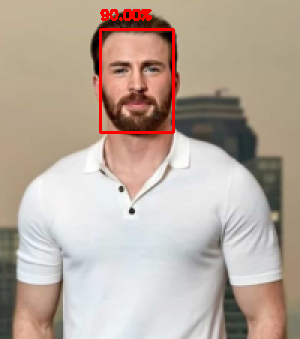

In [ ]:
cv2_imshow(image)